---
# Session 6 - Data and Infrastructure
---

## Accessing SQL Databases

In [ ]:
!pip install mysql-connector
import mysql.connector
import pandas as pd

con = mysql.connector.connect(
    host="relational.fel.cvut.cz",
    port=3306,
    user="guest",
    password="ctu-relational",
    database="sakila"
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp311-cp311-linux_x86_64.whl size=247951 sha256=93d20dbd9e3a2b54be4281659821a90c4d002165b283dcc51fa8c8795382ffdc
  Stored in directory: /root/.cache/pip/wheels/17/cd/ed/2d49e9bac69cf09382e4c7cc20a2511202b48324b87db26019
Successfully built mysql-connector


In [ ]:
query = """
SELECT f.title, COUNT(*) AS rental_count
FROM rental r
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
GROUP BY f.title
ORDER BY rental_count DESC
LIMIT 3;
"""

In [ ]:
df = pd.read_sql(query, con)
print(df)

con.close()

<ipython-input-3-73da5dfc7d81>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con)


                title  rental_count
0  BUCKET BROTHERHOOD            34
1    ROCKETEER MOTHER            33
2       SCALAWAG DUCK            32


## API

In [ ]:
with open("OMDb_API_Key.py", "w") as f:
    f.write('omdb_key = "a6c1a464"')

In [ ]:
import requests
# Access the key
from OMDb_API_Key import omdb_key

In [ ]:
# Send request
response = requests.get("http://www.omdbapi.com/",
            params = {"apikey": omdb_key,
                      "s": "despicable me",
                      "type": "movie",
                      "page": 1}).json()

In [ ]:
# Print titles of first four entries
for i in range(4):
    print(response["Search"][i]["Title"])

Despicable Me
Despicable Me 2
Despicable Me 3
Despicable Me 4


## Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup
# Send a GET request to the website
response = requests.get("https://www.tagesschau.de/inland/regional/badenwuerttemberg")
# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')
# Find all article titles using the CSS class for headlines
article_titles = [title.get_text().strip() for title in soup.select('.teaser__headline')]
for i, title in enumerate(article_titles[:5], start=1):
    print(f"{[i]}{title}")

[1]So heftig waren die Gewitter im Südosten Baden-Württembergs
[2]BW-Newsticker am Morgen: Starkes Unwetter in BW, Bahnstrecke Stuttgart-Mannheim wieder frei, Flugzeug muss wegen Unwetter zwischenlanden
[3]B290 bei Lauda voll gesperrt: Lkw kracht in den Gegenverkehr
[4]Helm-Räuber überfällt zum zweiten Mal Tankstelle
[5]Streckensperrung aufgehoben: Bahnstrecke zwischen Mannheim und Stuttgart ab Freitag wieder frei


## Programmatic Access (meteostat)

In [ ]:
!pip install meteostat

In [ ]:
!pip show meteostat

Name: meteostat
Version: 1.7.0
Summary: Access and analyze historical weather and climate data with Python.
Home-page: https://github.com/meteostat/meteostat-python
Author: Meteostat
Author-email: info@meteostat.net
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, pandas, pytz
Required-by: 


In [ ]:
import meteostat

In [ ]:
help(meteostat)

In [ ]:
from meteostat import Stations

stations = Stations()
stations = stations.nearby(48.5, 9.05) # Tübingen
print(stations.fetch(10))


                         name country region    wmo  icao  latitude  \
id                                                                    
D4294    Rottenburg-Kiebingen      DE     BW   <NA>  <NA>   48.4704   
D2074               Hechingen      DE     BW   <NA>  <NA>   48.3751   
D3278               Metzingen      DE     BW   <NA>  <NA>   48.5376   
D2159              Herrenberg      DE     BW   <NA>  <NA>   48.5915   
Q0A5Y        Neckartailfingen      DE     BW   <NA>  <NA>   48.6137   
D7138      Burladingen-Hausen      DE     BW   <NA>  <NA>   48.2962   
10738  Stuttgart-Echterdingen      DE     BW  10738  EDDS   48.6833   
D1937     Haigerloch-Weildorf      DE     BW   <NA>  <NA>   48.3705   
D3432                  Nagold      DE     BW   <NA>  <NA>   48.5667   
9ORL5              Urach, Bad      DE     BW   <NA>  <NA>   48.4951   

       longitude  elevation       timezone hourly_start hourly_end  \
id                                                                   
D4294  

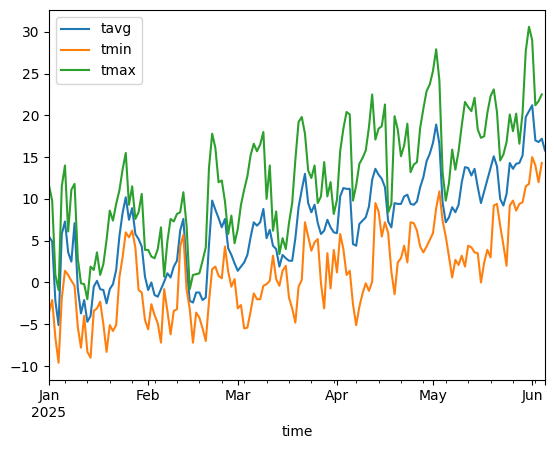

In [ ]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Daily

# Set time period
start = datetime(2025, 1, 1)
end = datetime(2025, 12, 31)

# Get daily data
data = Daily("D2074", start, end) # Metzingen = D3278
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=["tavg", "tmin", "tmax"])
#plt.savefig("meteostat-Metzingen.pdf", dpi=300, bbox_inches='tight')  # Save as high-res image
plt.show()